# 災害データに関する考察レポート

![タイトル](sai_title.png)

#### **1．はじめに**
本レポートは、EM-DAT災害データセットの分析を通じて、災害の発生パターンや特徴を把握し、考察することを目的とする。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
emdat = pd.read_csv('emdat.csv')


#### **2．データの分析**
EM-DAT災害データセットを分析する。最初に調べる対象は総死者数、最終的な災害の種類毎の危険度が高い国とする。まずは、情報の視認性を上げるため、分析する国を総死者数が20位以内の国に制限する。

In [2]:
death_ranking = emdat.groupby('Country')['Total Deaths'].sum().sort_values(ascending=False)
print("記録内総死者数20位以内の国：")
print(death_ranking.head(20))

記録内総死者数20位以内の国：
Country
China                         12522453.0
India                          9138244.0
Soviet Union                   3857423.0
Bangladesh                     2994475.0
Ethiopia                        417252.0
Haiti                           253200.0
Indonesia                       243370.0
Japan                           239761.0
Uganda                          207817.0
Niger                           196580.0
Pakistan                        181749.0
Italy                           171404.0
Sudan                           164241.0
Iran (Islamic Republic of)      163502.0
Türkiye                         150115.0
Myanmar                         147559.0
Mozambique                      107462.0
Peru                             97376.0
Cabo Verde                       85298.0
Guatemala                        80334.0
Name: Total Deaths, dtype: float64


In [3]:
def man(a):
    a = str(a)
    a = a.removesuffix(".0")

    if int(a) <= 9999:
        return a + "人"
    elif int(a[-4]) >= 5:
        return str( int(a[:-4]) + 1) + "万人"
    elif int(a[-4]) <= 4:
        return a[:-4] + "万人"
    else:
        print("失敗しました")

def soroe(b):
    b = str(b)
    
    for number in range(15 - int(len(b))):
        b = b + "　"
    
    return b

In [4]:
sisya = {
    '1': {"国": "中国", "死者": 12522453.0},
    '2': {"国": "インド", "死者": 9138244.0},
    '3': {"国": "ソ連", "死者": 3857423.0},
    '4': {"国": "バングラデシュ", "死者": 2994475.0},
    '5': {"国": "エチオピア", "死者": 417252.0},
    '6': {"国": "ハイチ", "死者": 253200.0},
    '7': {"国": "インドネシア", "死者": 243370.0},
    '8': {"国": "日本", "死者": 239761.0},
    '9': {"国": "ウガンダ", "死者": 207817.0},
    '10': {"国": "ニジェール", "死者": 196580.0},
    '11': {"国": "パキスタン", "死者": 181749.0},
    '12': {"国": "イタリア", "死者": 171404.0},
    '13': {"国": "スーダン", "死者": 164241.0},
    '14': {"国": "イラン・イスラム共和国", "死者": 163502.0},
    '15': {"国": "トルコ", "死者": 150115.0},
    '16': {"国": "ミャンマー", "死者": 147559.0},
    '17': {"国": "モザンビーク", "死者": 107462.0},
    '18': {"国": "ペルー", "死者": 97376.0},
    '19': {"国": "カーボベルデ", "死者": 85298.0},
    '20': {"国": "グアテマラ", "死者": 80334.0}
}

print("→日本語翻訳(単位以下四捨五入)")
for c in range(1,20):
    key = str(c)
    print("★" + soroe(sisya[str(key)]["国"]), man(sisya[str(key)]["死者"]))

→日本語翻訳(単位以下四捨五入)
★中国　　　　　　　　　　　　　 1252万人
★インド　　　　　　　　　　　　 914万人
★ソ連　　　　　　　　　　　　　 386万人
★バングラデシュ　　　　　　　　 299万人
★エチオピア　　　　　　　　　　 42万人
★ハイチ　　　　　　　　　　　　 25万人
★インドネシア　　　　　　　　　 24万人
★日本　　　　　　　　　　　　　 24万人
★ウガンダ　　　　　　　　　　　 21万人
★ニジェール　　　　　　　　　　 20万人
★パキスタン　　　　　　　　　　 18万人
★イタリア　　　　　　　　　　　 17万人
★スーダン　　　　　　　　　　　 16万人
★イラン・イスラム共和国　　　　 16万人
★トルコ　　　　　　　　　　　　 15万人
★ミャンマー　　　　　　　　　　 15万人
★モザンビーク　　　　　　　　　 11万人
★ペルー　　　　　　　　　　　　 10万人
★カーボベルデ　　　　　　　　　 9万人


これで、記録内の災害による合計した死者数が20位以内の国を表示できた。これをグラフにするとこうなる。

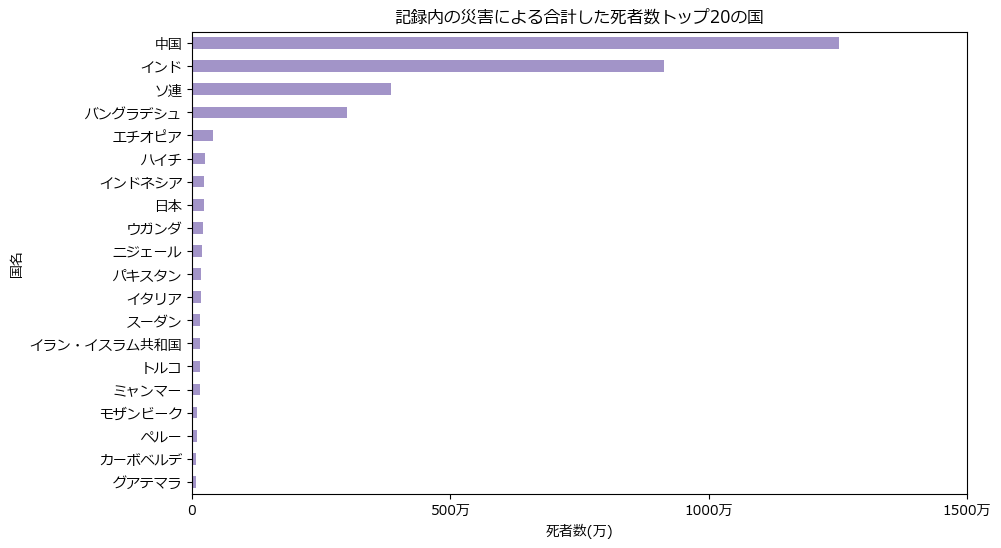

In [5]:
sisya_df = pd.DataFrame.from_dict(sisya, orient='index')

sisya_ranking = sisya_df.set_index("国")["死者"]

import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'Meiryo'
rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 6))
sisya_ranking.plot(kind='barh', color='#A294C8')
plt.xlabel('死者数(万)')
plt.xticks([0, 5000000, 10000000, 15000000],[0, "500万", "1000万", "1500万"])
plt.ylabel('国名')
plt.title('記録内の災害による合計した死者数トップ20の国')
plt.gca().invert_yaxis()
plt.show()

このグラフを見ると、上位４ヵ国と他の国の総死者数に大きな差があることが分かる。これは、記録として残っているデータの数が国ごとにちがう事、国ごとの人口に差があるのが理由である。<br>
これにより、***記録が多く残されている国ほど死者数が多くなる***、***規模の大きな国ほど死者数が多くなる***という二つの現象がおきている。<br>
今回の目的は、***災害の種類ごとの危険度が高い国***を特定する事なので、今度は上記の二つの影響を補正する。

#### **3．目的に近づける**
一つ目の問題である。***記録が多く残されている国ほど死者数が多くなる***これを解決するのは、年代ごとの記録の正確さという面を考慮に入れなければ簡単だ。単純に、記録の平均を求めてしまえばいい。

In [6]:
kiroku_ranking = emdat.groupby('Country').size().sort_values(ascending=False)
print(kiroku_ranking)

Country
United States of America      1172
China                         1023
India                          785
Philippines                    710
Indonesia                      636
                              ... 
Liechtenstein                    1
Sint Maarten (Dutch part)        1
Saint Martin (French Part)       1
Saint Barthélemy                 1
Saint Helena                     1
Length: 230, dtype: int64
